Develop/Train A Multilayer Neural Netwok For MNIST Dataset
====


### Load the dataset

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('/tmp/data', one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


/home/vahid/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


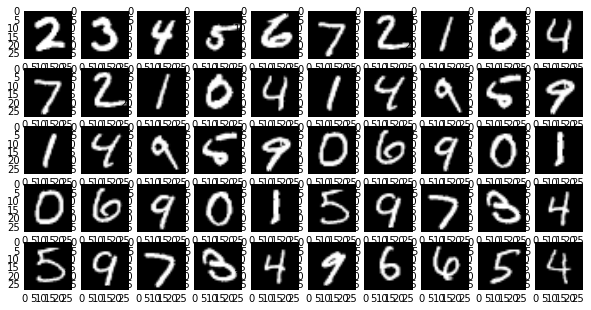

In [2]:
## Visualize a sample subset of data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

f,a = plt.subplots(5,10,figsize=(10,5))
for i in range(5):
    for j in range(10):
        index = (i-1)*5 + j
        a[i][j].imshow(np.reshape(mnist_data.test.images[index],(28,28)), cmap='Greys_r')
f.show()


### Set Network and Learning Parameters



In [3]:
## set learning parameters
learning_rate = 0.2
batch_size = 128
training_iters = 10000
display_step = 2000
logs_path = '/tmp/tensorflow_logs/CNN'

# set network parameters
num_weights = 32
num_dims = 784    ## number of input pixels
num_classes = 10  
num_layers = 1    ## number of hidden layers


# create placeholders for data
x = tf.placeholder('float', [None, num_dims])
y_ = tf.placeholder('float', [None, num_classes])



## define a dictionary for weights for a multi-layer network upto 10
## note: only num_layers will be used
# initialize weights and biases
weights = {
    1:tf.Variable(tf.truncated_normal([num_dims, num_weights], stddev=0.1)),
    2:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    3:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    4:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    5:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    6:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    7:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    8:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    9:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    10:tf.Variable(tf.truncated_normal([num_weights, num_weights], stddev=0.1)),
    'output':tf.Variable(tf.truncated_normal([num_weights, num_classes], stddev=0.1))
}

biases = {
    1:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    2:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    3:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    4:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    5:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    6:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    7:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    8:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    9:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    10:tf.Variable(tf.constant(0.1, shape=[num_weights])),
    'output':tf.Variable(tf.constant(0.1, shape=[num_classes]))
}

# now, define the network
def multilayer_neural_network(x, weights, biases, num_layers):
    out_layer = x
    for i in range(1, num_layers+1, 1):
        out_layer = tf.add(tf.matmul(out_layer, weights[i]), biases[i])
        out_layer = tf.nn.relu(out_layer)
        
    ## last layer
    out_layer = tf.add(tf.matmul(out_layer, weights['output']), biases['output'])
    return out_layer



### Tensorflow Session

In [5]:
#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)

## Loss function: softmax loss with cross_entropy
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

## accuracy
correct_prediction = tf.equal(tf.argmax(y, dimension=1), tf.argmax(y_, dimension=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

## optimizier: gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

## initialize
init = tf.initialize_all_variables()
    
with tf.Session() as sess:
    sess.run(init)
    losses = []
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

    print("Optimization Finished!\n")
    print("Train Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.train.images, 
                                          y_: mnist_data.train.labels})
          ))
    print("Test Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.test.images, 
                                          y_: mnist_data.test.labels})
          ))
    

Iter: 0000 batch loss= 2.309615612 batch accuracy= 0.14062
Iter: 2000 batch loss= 0.137590393 batch accuracy= 0.96094
Iter: 4000 batch loss= 0.066959381 batch accuracy= 0.98438
Iter: 6000 batch loss= 0.062386092 batch accuracy= 0.97656
Iter: 8000 batch loss= 0.063578814 batch accuracy= 0.98438
Optimization Finished!

Train Accuracy: 98.4036
Test Accuracy: 96.9500


## Using 10 hidden layers

In [6]:
num_layers = 10

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


## initialize
init = tf.initialize_all_variables()
losses_gd = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_gd.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

    print("Optimization Finished!\n")
    print("Train Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.train.images, 
                                          y_: mnist_data.train.labels})
          ))
    print("Test Accuracy: {:.4f}".format(100*
            sess.run(accuracy, feed_dict={x: mnist_data.test.images, 
                                          y_: mnist_data.test.labels})
          ))


Iter: 0000 batch loss= 2.352838278 batch accuracy= 0.11719
Iter: 2000 batch loss= 0.129220024 batch accuracy= 0.96094
Iter: 4000 batch loss= 0.082538478 batch accuracy= 0.97656
Iter: 6000 batch loss= 0.112719603 batch accuracy= 0.96094
Iter: 8000 batch loss= 0.089707717 batch accuracy= 0.97656
Optimization Finished!

Train Accuracy: 98.5618
Test Accuracy: 96.8900


## Comparing optimizers

In [7]:
num_layers = 10
learning_rate = 0.0002
batch_size = 1
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

## initialize
init = tf.initialize_all_variables()
losses_sgd = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_sgd.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

Iter: 0000 batch loss= 2.629067659 batch accuracy= 0.00000
Iter: 0200 batch loss= 2.007363319 batch accuracy= 0.00000
Iter: 0400 batch loss= 1.782565475 batch accuracy= 1.00000
Iter: 0600 batch loss= 1.932910085 batch accuracy= 1.00000
Iter: 0800 batch loss= 2.619491339 batch accuracy= 0.00000


In [10]:
num_layers = 10
learning_rate = 0.2
batch_size = 100
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

## initialize
init = tf.initialize_all_variables()
losses_minibatchgd = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_minibatchgd.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            

Iter: 0000 batch loss= 2.342706919 batch accuracy= 0.06000
Iter: 0200 batch loss= 0.438378781 batch accuracy= 0.89000
Iter: 0400 batch loss= 0.538092375 batch accuracy= 0.89000
Iter: 0600 batch loss= 0.342107236 batch accuracy= 0.91000
Iter: 0800 batch loss= 0.134263113 batch accuracy= 0.96000


In [31]:
num_layers = 10
learning_rate = 0.4
batch_size = 100
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


optimizer = tf.train.AdadeltaOptimizer(learning_rate, 
                                       rho=0.95, 
                                       epsilon=1e-08,).minimize(cross_entropy_loss)


## initialize
init = tf.initialize_all_variables()
losses_adadelta = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_adadelta.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            


Iter: 0000 batch loss= 2.314767122 batch accuracy= 0.11000
Iter: 0200 batch loss= 1.195329309 batch accuracy= 0.72000
Iter: 0400 batch loss= 0.608640492 batch accuracy= 0.82000
Iter: 0600 batch loss= 0.650290072 batch accuracy= 0.79000
Iter: 0800 batch loss= 0.477615476 batch accuracy= 0.90000


In [16]:
num_layers = 10
learning_rate = 0.2
batch_size = 100
training_iters = 1000
display_step = 200

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


optimizer = tf.train.AdagradOptimizer(learning_rate, 
                                       initial_accumulator_value=0.1).minimize(cross_entropy_loss)


## initialize
init = tf.initialize_all_variables()
losses_adagrad = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_adagrad.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            


Iter: 0000 batch loss= 2.331370115 batch accuracy= 0.15000
Iter: 0200 batch loss= 0.203349859 batch accuracy= 0.94000
Iter: 0400 batch loss= 0.199869290 batch accuracy= 0.94000
Iter: 0600 batch loss= 0.197139323 batch accuracy= 0.94000
Iter: 0800 batch loss= 0.100929394 batch accuracy= 0.98000


In [20]:
num_layers = 10
learning_rate = 0.01
batch_size = 128

#~~~~~~~~~~~~~~~~~~~~~~~define objects~~~~~~~~~~~~~~~~~~~~~~~~~~#
## prediction
y = multilayer_neural_network(x, weights, biases, num_layers)


optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy_loss)


## initialize
init = tf.initialize_all_variables()
losses_adam = []

with tf.Session() as sess:
    sess.run(init)
    
    for itr in range(0, training_iters):
        batch_x, batch_y = mnist_data.train.next_batch(batch_size)
        _,loss,acc = sess.run([optimizer, cross_entropy_loss, accuracy],
                           feed_dict={x:batch_x, y_:batch_y})
        losses_adam.append(loss)
        if itr % display_step == 0:
            print ("Iter: {:04d} batch loss= {:.9f} batch accuracy= {:.5f}".format(
                    itr, loss, acc))
            


Iter: 0000 batch loss= 2.327966213 batch accuracy= 0.10938
Iter: 0200 batch loss= 0.318910301 batch accuracy= 0.89844
Iter: 0400 batch loss= 0.187112227 batch accuracy= 0.93750
Iter: 0600 batch loss= 0.259472340 batch accuracy= 0.92188
Iter: 0800 batch loss= 0.055487867 batch accuracy= 0.98438


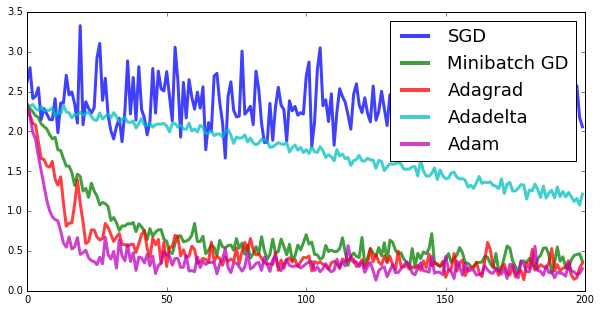

In [32]:
fig = plt.figure(figsize=(10,5))
plt.plot(np.arange(200), losses_sgd[:200], lw=3, alpha=0.75)
plt.plot(np.arange(200), losses_minibatchgd[:200], lw=3, alpha=0.75)
plt.plot(np.arange(200), losses_adagrad[:200], lw=3, alpha=0.75)
plt.plot(np.arange(200), losses_adadelta[:200], lw=3, alpha=0.75)
plt.plot(np.arange(200), losses_adam[:200], lw=3, alpha=0.75)
leg = plt.legend(('SGD', 'Minibatch GD', 'Adagrad', 'Adadelta', 'Adam'), fontsize=18)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4)
plt.show()